# Lending Club

> Lending Club Case Study Analysis <br>
Team : Gnanaprakash and Vikas Sharma <br>
Date : 06-09-2023

## Table of Contents
* [Problem Statement](#problem-statement)
   * [Loan Application Decisions](#decisions)
   * [Solution](#solution)
* [Including Necessary Libraries](#libraries)   
* [Data Source](#datasource)
   * [Understanding from source](#source_understanding)
* [Data Cleaning](#datacleaning)
   * [Fixing Missing Values](#fix_missing)
* [Data Analysis](#dataanalysis)
   * [Univariant Analysis](#univariate)
   * [Bivariant Analysis](#bivariate)
* [Conclusions](#conclusions)

## Problem Statement <a class="anchor" id="problem-statement"></a>

> <font color="blue"> Assumption that we are working in <font color="green"> **consumer finance company** </font> which specialises in lending various types of loans to urban customers. </font>



When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. 

Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### <font color="brown"> Loan Application Decisions </font> <a class="anchor" id="decisions"></a>
When a person applies for a loan, there are two types of decisions that could be taken by the company:
![Loan Data Set](Loan_Dataset.png)

### <font color="brown"> Solution </font> <a class="anchor" id="solution"></a>
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

<font color="blue"> Will be using Exploratory data analysis(EDA) to understand how **consumer attributes** and **loan attributes** influence the tendency of default. </font>

## Including Necessary Libraries<a class="anchor" id="libraries"></a>

In [50]:
# Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
import warnings
# if there are any warning due to version mismatch, it will be ignored
warnings.filterwarnings('ignore')
# python version 
from platform import python_version
# Text style
from colorama import Fore, Back, Style
# To check the Matplot version
import matplotlib as plt_ver

In [58]:
# Get all the library versions
print('Library Versions:')
print('Python:',python_version(),'| Numpy:',np.__version__,'| Pandas:',pd.__version__, '| Seaborn:', sns.__version__, '| Matplot:', plt_ver.__version__)

Library Versions:
Python: 3.11.3 | Numpy: 1.24.3 | Pandas: 1.5.3 | Seaborn: 0.12.2 | Matplot: 3.7.1


## Data Source <a class="anchor" id="datasource"></a>

The data `loan.csv` given contains information about past loan applicants and whether they `defaulted` or not.

In [59]:
# Loading the CSV file
loan_applicants = pd.read_csv('loan.csv')

In [60]:
# Print the first 5 rows
loan_applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [61]:
# Print the last 5 rows
loan_applicants.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Number of rows and columns
print('Dataframe Shape:', loan_applicants.shape)

Dataframe Shape: (39717, 111)


In [63]:
# Get Number of Invalid information from the source
loan_applicants.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [64]:
# Total number of columns data which are completely invalid
print(f'Number of Columns has mostly invalid dats: {sum(loan_applicants.isnull().sum() == loan_applicants.shape[0])}')

Number of Columns has mostly invalid dats: 54


In [65]:
loan_applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### <font color="brown">Understanding from Source:</font>  <a class="anchor" id="source_understanding"></a>
- Data source are consider as ***private*** data and belongs to ***consumer finance company***.
- There are ***39717 rows***  and ***111 columns*** present.
- There are ***54 columns*** data that are completely invalid
- There is ***no partial*** missing data in columns

## Data Cleaning <a class="anchor" id="datacleaning"></a>

### <font color="brown">Fixing Missing Values:</font>  <a class="anchor" id="fix_missing"></a>

In [66]:
# Droping more than 80% data of column/row is invalid
limit_percentage = 0.80
row_nadata_limit = 0
col_nadata_limit = 0

In [67]:
rows = 0
columns = 0
# To update the rows, columns, invalid_data_limit and print the updated rows and columns
# Param: Dataframe to get rows and columns of it
def load_n_print_dimensions(data_frame):
    global rows, columns, limit_percentage, col_nadata_limit, row_nadata_limit

    rows = len(data_frame.axes[0])
    columns = len(data_frame.axes[1])
    col_nadata_limit = rows * limit_percentage
    row_nadata_limit = columns * limit_percentage

    print(f'Rows: {rows} Columns: {columns}')

load_n_print_dimensions(loan_applicants)
print(col_nadata_limit, row_nadata_limit)

Rows: 39717 Columns: 111
31773.600000000002 88.80000000000001


In [68]:
# Drop columns that contains all value as NaN
loan_applicants.dropna(axis='columns', inplace=True, thresh=col_nadata_limit)
print('Dropped >=80% Invalid data on columns :-', end="")
load_n_print_dimensions(loan_applicants)

# Drop rows that contains all value as NaN
loan_applicants.dropna(axis='rows', inplace=True, thresh=row_nadata_limit)

print('Dropped >=80% Invalid data on rows :-', end="")
load_n_print_dimensions(loan_applicants)

# Droping columns where the unique value is only one
loan_applicants.drop(loan_applicants.loc[:,loan_applicants.apply(pd.Series.nunique) <= 1], axis=1, inplace=True)
print('Dropped <=1 Unique values :-', end="")
load_n_print_dimensions(loan_applicants)

Dropped >=80% Invalid data on columns :-Rows: 39717 Columns: 53
Dropped >=80% Invalid data on rows :-Rows: 39717 Columns: 53
Dropped <=1 Unique values :-Rows: 39717 Columns: 44


In [69]:
# Verifying number of rows and columns
load_n_print_dimensions(loan_applicants)

Rows: 39717 Columns: 44


In [70]:
# Checking to fix missing data
loan_applicants.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

In [71]:
# Fix Job Title as 'Unknown' for data which are not provided
print(loan_applicants.emp_title.unique())
loan_applicants.emp_title.fillna('Unknown', inplace=True)

[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']


In [72]:
# Fix Home Ownership with NONE as 
loan_applicants.home_ownership.replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_applicants.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [73]:
# Print the first 5 rows
loan_applicants.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


## Data Analysis <a class="anchor" id="dataanalysis"></a>

### <font color="brown"> Analyzing the driving factor for defaulting the loan applicants</font>

- We have 44 columns post fixing Missing Values
- Based on analysing the 44 columns meta data, removing the columns which are considered to be non-driving factor for defaulting the loan applicants
    - "id", "member_id", "url", "title", "zip_code", "addr_state", "emp_title", "delinq_2yrs", "revol_bal", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d"

In [74]:
loan_applicants.drop(["id", "member_id", "url", "title", 
                      "zip_code", "addr_state", "delinq_2yrs",
                      "emp_title", "revol_bal", "out_prncp", "out_prncp_inv",
                      "total_pymnt", "total_pymnt_inv", "total_rec_prncp",
                      "total_rec_int", "last_pymnt_d", "last_pymnt_amnt",
                      "last_credit_pull_d"], axis = 1, inplace = True)
load_n_print_dimensions(loan_applicants)

Rows: 39717 Columns: 26


In [75]:
# Dumping the each column datatypes
loan_applicants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [76]:
# Checking possibility of converting the object type to a valid datatypes
columns_df =  loan_applicants.columns
idx=0
for col in columns_df:
    dtype = type(loan_applicants[col].dtypes)
    if "object"  in str(dtype):
        print(f"##### Column - {col} Type - {dtype}")
        print(loan_applicants[col].head(1)[0])

##### Column - term Type - <class 'numpy.dtype[object_]'>
 36 months
##### Column - int_rate Type - <class 'numpy.dtype[object_]'>
10.65%
##### Column - grade Type - <class 'numpy.dtype[object_]'>
B
##### Column - sub_grade Type - <class 'numpy.dtype[object_]'>
B2
##### Column - emp_length Type - <class 'numpy.dtype[object_]'>
10+ years
##### Column - home_ownership Type - <class 'numpy.dtype[object_]'>
RENT
##### Column - verification_status Type - <class 'numpy.dtype[object_]'>
Verified
##### Column - issue_d Type - <class 'numpy.dtype[object_]'>
Dec-11
##### Column - loan_status Type - <class 'numpy.dtype[object_]'>
Fully Paid
##### Column - purpose Type - <class 'numpy.dtype[object_]'>
credit_card
##### Column - earliest_cr_line Type - <class 'numpy.dtype[object_]'>
Jan-85
##### Column - revol_util Type - <class 'numpy.dtype[object_]'>
83.70%


<font color="blue">Based on analysing the object type columns, below are convertible to useful format</font>
- **Columns in %:**
  - int_rate
  - revol_util
- **Columns in (month-year):**
  - issue_d
  - earliest_cr_line
  - initial_list_status

In [77]:
# Convert All percentage in object type to float type
loan_applicants['int_rate_p'] = loan_applicants['int_rate'].apply(lambda y: y.split('%')[0]).astype(float)
# Filling the revol_util NaN with Median
rev_median = loan_applicants['revol_util'].str.replace('%', '').median()
loan_applicants['revol_util'] = loan_applicants['revol_util'].fillna(f'{rev_median}%')
# Convert All percentage in object type to float type
loan_applicants['revol_util_p'] = loan_applicants['revol_util'].apply(lambda y: y.split('%')[0]).astype(float)

In [78]:
# Convert All Month-Year object type to Date Time format
loan_applicants['issue_d'] = loan_applicants['issue_d'].str.replace('-','-19')
loan_applicants['earliest_cr_line'] = loan_applicants['earliest_cr_line'].str.replace('-','-19')

loan_applicants['issue_d'] = pd.to_datetime(loan_applicants['issue_d'], format='%b-%Y')
loan_applicants['earliest_cr_line'] = pd.to_datetime(loan_applicants['earliest_cr_line'], format='%b-%Y')

In [79]:
# Subgrade refers to Grade + Sub division value from grade, Updating the value with Sub division of it
loan_applicants['sub_grade'] = loan_applicants['sub_grade'].apply(lambda y: y[1]).astype(int)

In [80]:
loan_applicants.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,sub_grade,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,int_rate_p,revol_util_p
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,3.051917,6.896893e+04,13.315130,0.869200,9.294408,0.055065,22.088828,1.363015,95.221624,12.406112,0.043260,12.021177,48.832741
std,7456.670694,7187.238670,7128.450439,208.874874,1.395114,6.379377e+04,6.678594,1.070219,4.400282,0.237200,11.401709,7.289979,688.744771,148.671593,0.204324,3.724825,28.314798
min,500.000000,500.000000,0.000000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.420000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,9.250000,25.500000
50%,10000.000000,9600.000000,8975.000000,280.220000,3.000000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,11.860000,49.300000
75%,15000.000000,15000.000000,14400.000000,430.780000,4.000000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,14.590000,72.300000
max,35000.000000,35000.000000,35000.000000,1305.190000,5.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,90.000000,180.200000,29623.350000,7002.190000,2.000000,24.590000,99.900000


### <font color="brown">Univariate Analysis - Column 'Loan_status' value 'Charged Off' refers to `defaulted` for the applicant</font> <a class="anchor" id="univariate"></a>


In [81]:
# Analysing different columns to check the driving factor for Defaulted which is - 'Charged Off' in loan_status
print(f'Unique values in loan_status: {loan_applicants["loan_status"].unique()}')

Unique values in loan_status: ['Fully Paid' 'Charged Off' 'Current']


In [82]:
def column_information(loan_applicants=loan_applicants):
    print("-------------------------------------------------------")
    print("%-23s %-15s %-4s" % ('Column', 'Dtype', 'Unique Count'))
    print("-------------------------------------------------------")
    i = 1
    for each in loan_applicants.columns:
        print("%d %-23s %-15s %-4d" % (i, each, loan_applicants[each].dtype, loan_applicants[each].nunique()))
        i = i + 1

column_information()

-------------------------------------------------------
Column                  Dtype           Unique Count
-------------------------------------------------------
1 loan_amnt               int64           885 
2 funded_amnt             int64           1041
3 funded_amnt_inv         float64         8205
4 term                    object          2   
5 int_rate                object          371 
6 installment             float64         15383
7 grade                   object          7   
8 sub_grade               int32           5   
9 emp_length              object          11  
10 home_ownership          object          4   
11 annual_inc              float64         5318
12 verification_status     object          3   
13 issue_d                 datetime64[ns]  55  
14 loan_status             object          3   
15 purpose                 object          14  
16 dti                     float64         2868
17 earliest_cr_line        datetime64[ns]  526 
18 inq_last_6mths          

In [83]:
# Seperating it for Univarient Analysing
categorical_columns = ['term', 'emp_length', 'home_ownership',
                       'verification_status', 'purpose', 'inq_last_6mths',
                       'pub_rec', 'pub_rec_bankruptcies', 'grade' ]
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc',
                     'dti', 'open_acc', 'total_acc', 'total_rec_late_fee', 'recoveries',
                     'collection_recovery_fee', 'int_rate_p', 'revol_util_p']
date_time_columns = [ 'issue_d' , 'earliest_cr_line' ]

In [84]:
# Get the defaulted applicant
defaulted_applicant = loan_applicants[loan_applicants['loan_status'] == 'Charged Off']

In [85]:
# Creating quartile bins for numerical columns to make them categorical
quartile_keys = [ '0-20% Chance', '20%-40% Chance', '40%-60% Chance', '60%-80% Chance', '80%-100% Chance' ]

In [86]:
def convert_numerical_into_categorical(data_columns, keys=quartile_keys, loan_applicants=loan_applicants,
                                       defaulted_applicant=defaulted_applicant, defaulted=False):
    bin_bucket = 5
    df = None
    if defaulted == True:
        df = defaulted_applicant
    else:
        df = loan_applicants
    quartile_bin, bins = pd.cut(df[data_columns], bin_bucket, labels=keys, retbins=True, duplicates='drop', precision=2)
    return quartile_bin, bins

In [87]:
def defaulted_analysis_based_on_quartile(columns, loan_applicants=loan_applicants):
    quartile_data, bin_value = convert_numerical_into_categorical(data_columns=columns, defaulted=True)
    quartile_count = quartile_data.value_counts()
    quart_dict = quartile_count.to_dict()
    # Get all the values in dictionary
    quartile_value = quart_dict.values()
    sorted_dict = sorted(quart_dict.items(), key=lambda x:x[1])
    qkey = sorted_dict[-1][0]
    if len(set(quartile_value)) <= 1:
        # All values are equal
        print(Fore.RED + f'Changes in the {columns} doesnot impact the chance of defaulted')
    elif '0-20%' in qkey:
        low = loan_applicants[columns].min()
        print(Fore.RED +f'Lower the {columns} increases the chance of defaulted - Range ({low} - {bin_value[1]})')
    elif '80%-100%' in qkey:
        print(Fore.RED + f'Higher the {columns} increases the chance of defaulted - Range ({bin_value[4]} - {bin_value[5]}')
    elif '20%-40%' in qkey:
        print(Fore.RED + f'Between 20%-40% of the {columns} increases the chance of defaulted - Range ({bin_value[1]} - {bin_value[2]}')
    elif '40%-60%' in qkey:
        print(Fore.RED + f'Between 40%-60% of the {columns} increases the chance of defaulted - Range ({bin_value[2]} - {bin_value[3]}')
    elif '60%-80%' in qkey:
        print(Fore.RED + f'Between 60%-80% of the {columns} increases the chance of defaulted - Range ({bin_value[3]} - {bin_value[4]}')

In [88]:
for each in numerical_columns:
    print(each, loan_applicants[each].nunique())

loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
installment 15383
annual_inc 5318
dti 2868
open_acc 40
total_acc 82
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
int_rate_p 371
revol_util_p 1089


Lower the loan_amnt increases the chance of defaulted - Range (500 - 7720.0)


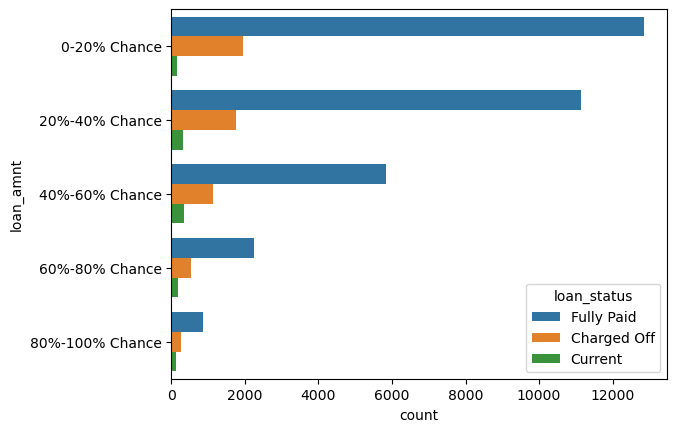

Lower the funded_amnt increases the chance of defaulted - Range (500 - 7720.0)


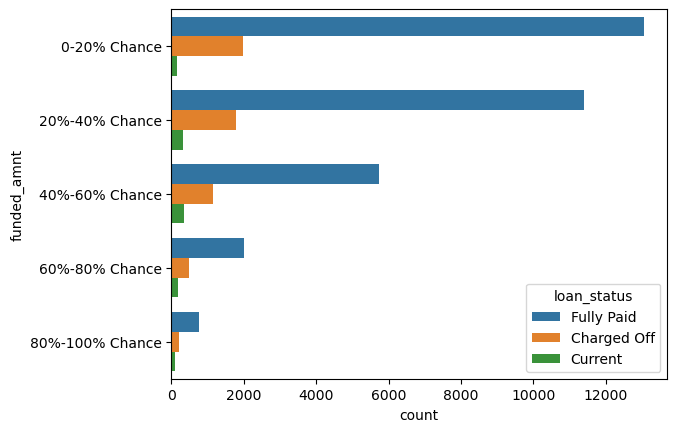

Lower the funded_amnt_inv increases the chance of defaulted - Range (0.0 - 7000.0)


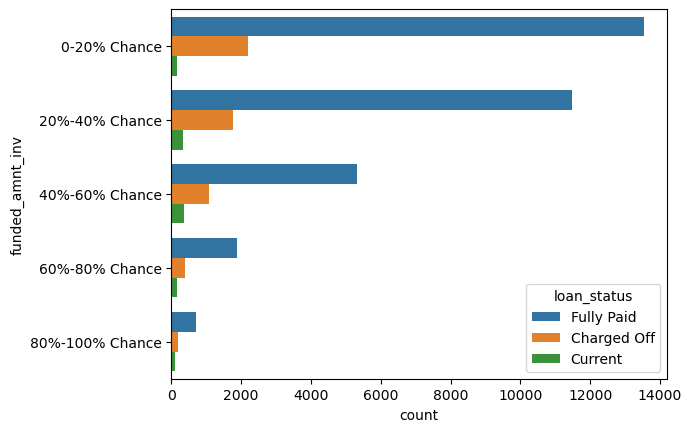

Lower the installment increases the chance of defaulted - Range (15.69 - 279.27000000000004)


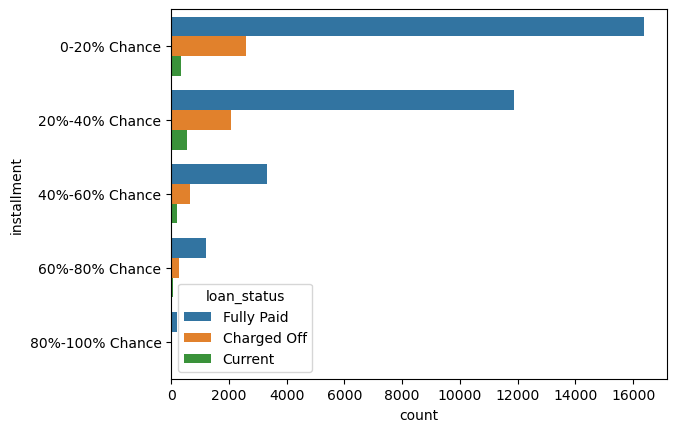

Lower the annual_inc increases the chance of defaulted - Range (4000.0 - 253264.0)


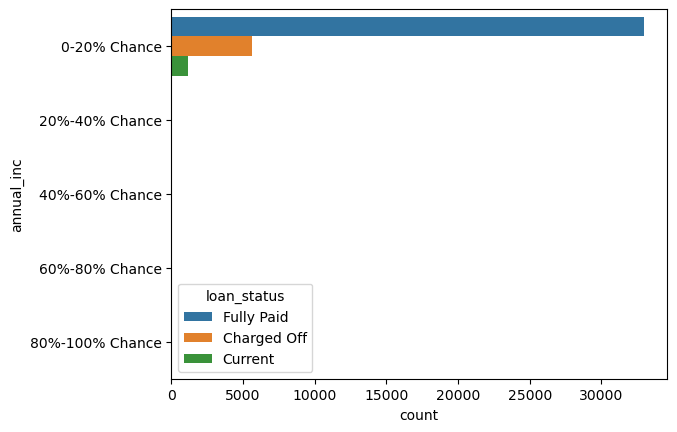

Between 40%-60% of the dti increases the chance of defaulted - Range (11.940000000000001 - 17.910000000000004


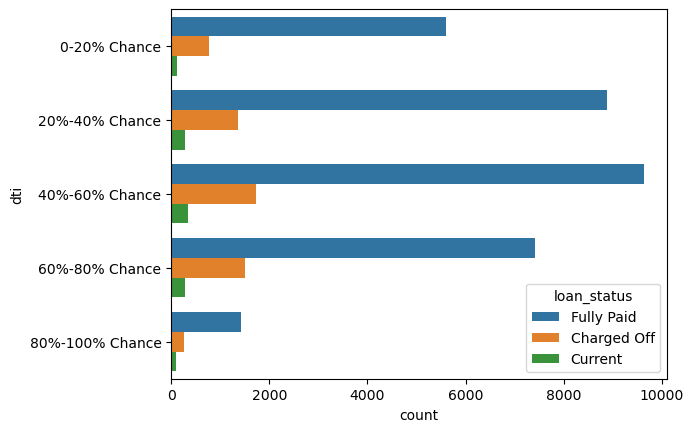

Lower the open_acc increases the chance of defaulted - Range (2 - 9.2)


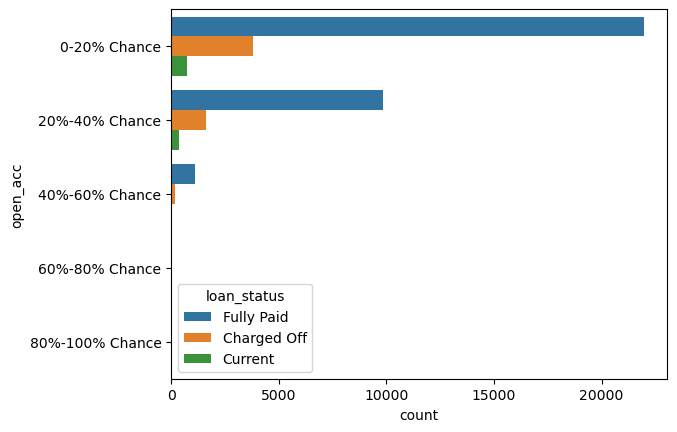

Between 20%-40% of the total_acc increases the chance of defaulted - Range (16.4 - 30.8


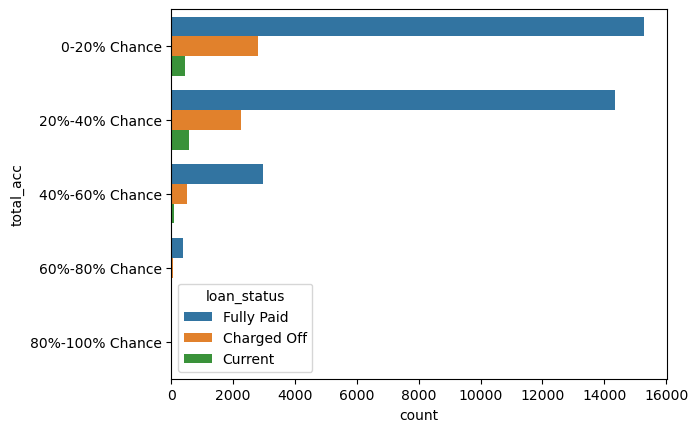

Lower the total_rec_late_fee increases the chance of defaulted - Range (0.0 - 36.04)


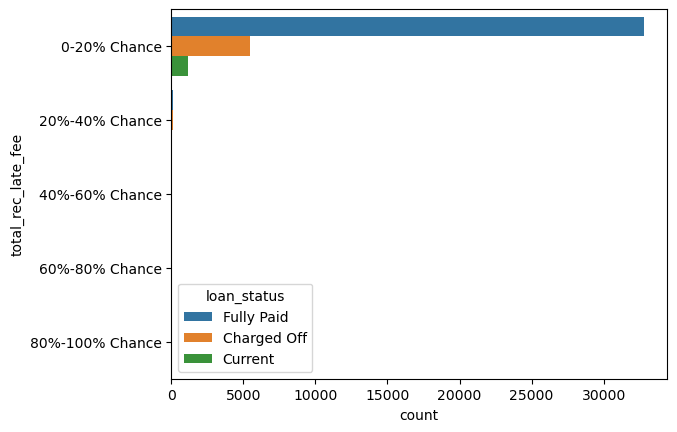

Lower the recoveries increases the chance of defaulted - Range (0.0 - 5924.67)


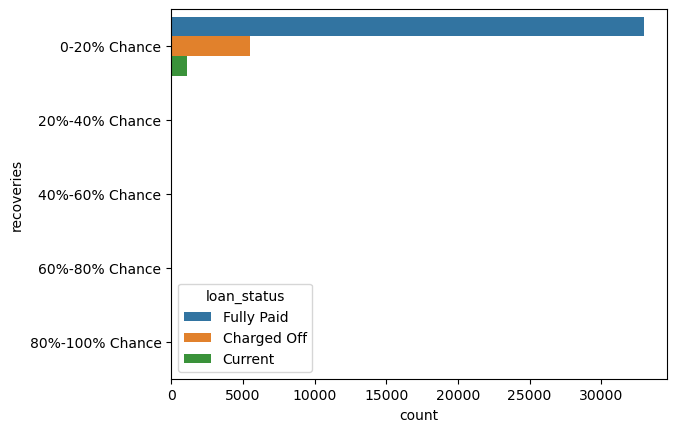

Lower the collection_recovery_fee increases the chance of defaulted - Range (0.0 - 1400.4379999999999)


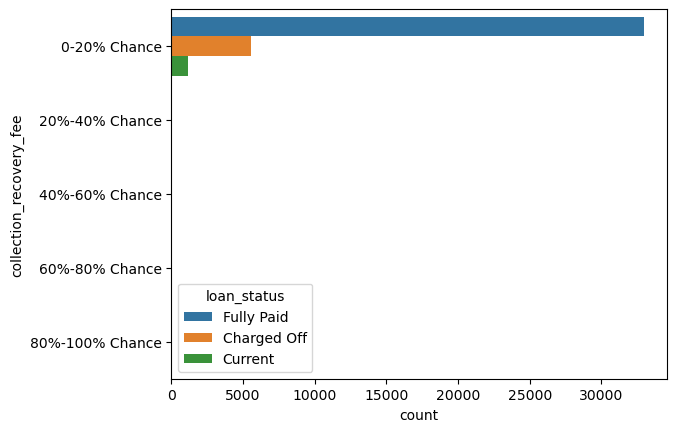

Between 40%-60% of the int_rate_p increases the chance of defaulted - Range (13.011999999999999 - 16.808


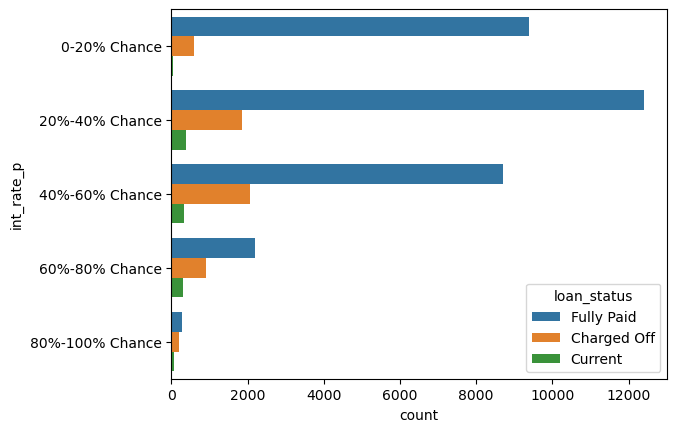

Between 60%-80% of the revol_util_p increases the chance of defaulted - Range (59.94 - 79.92


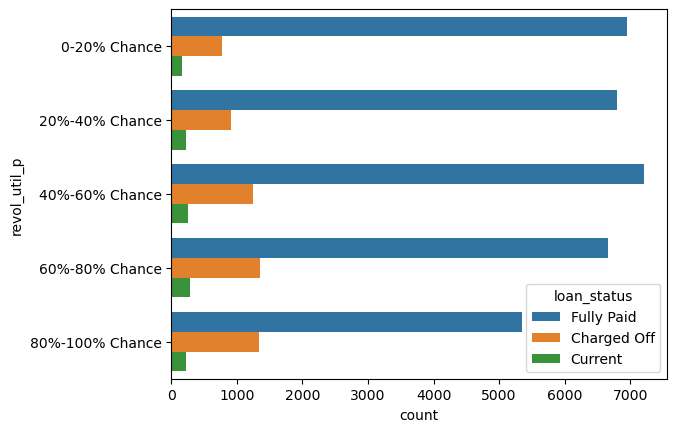

In [89]:
for column in numerical_columns:
    defaulted_analysis_based_on_quartile(column)
    quartile_bin, bin_value =  convert_numerical_into_categorical(column)
    sns.countplot(y=quartile_bin, hue=loan_applicants['loan_status'])
    plt.show()

Higher chance of defaulted for "  36 months" in term column


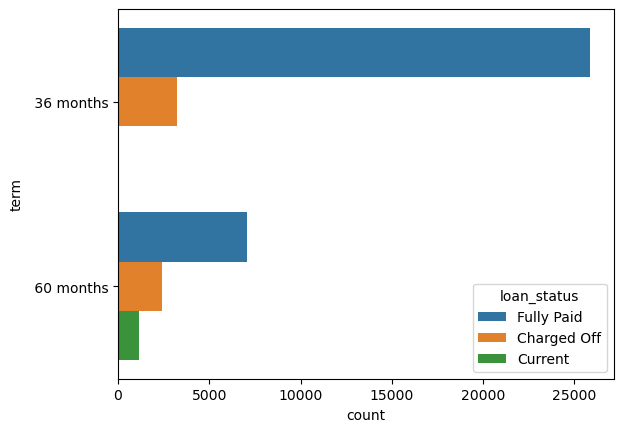

Higher chance of defaulted for " 10+ years" in emp_length column


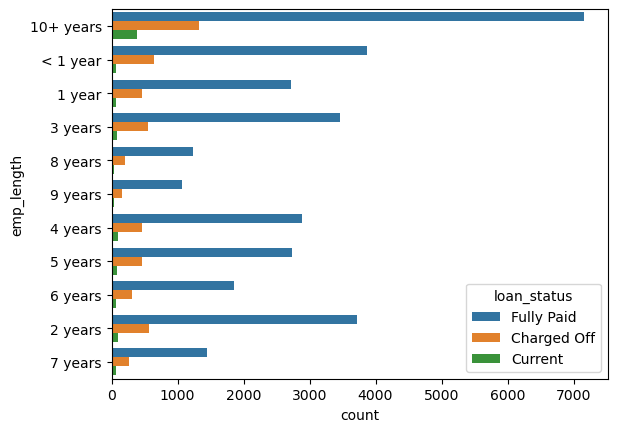

Higher chance of defaulted for " RENT" in home_ownership column


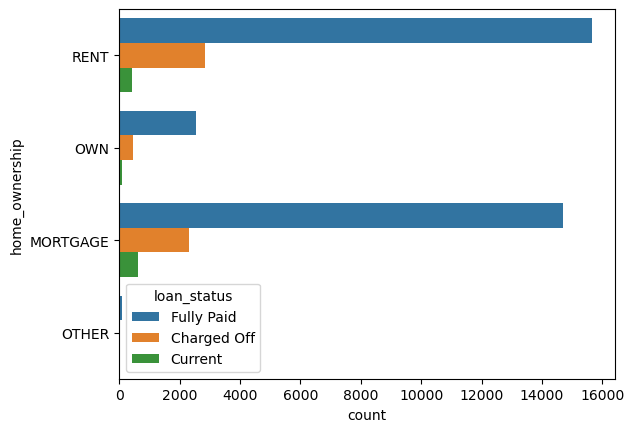

Higher chance of defaulted for " Not Verified" in verification_status column


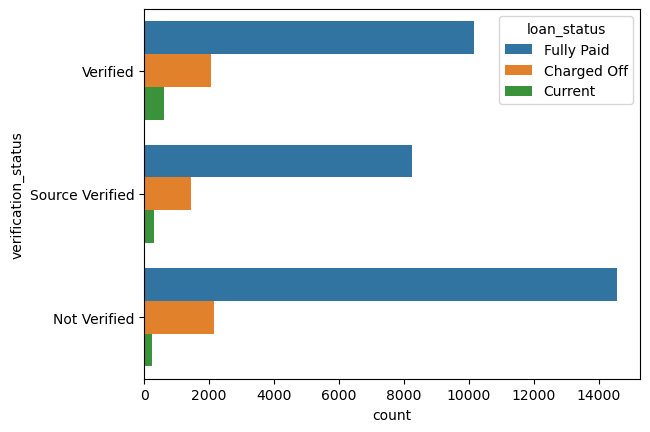

Higher chance of defaulted for " debt_consolidation" in purpose column


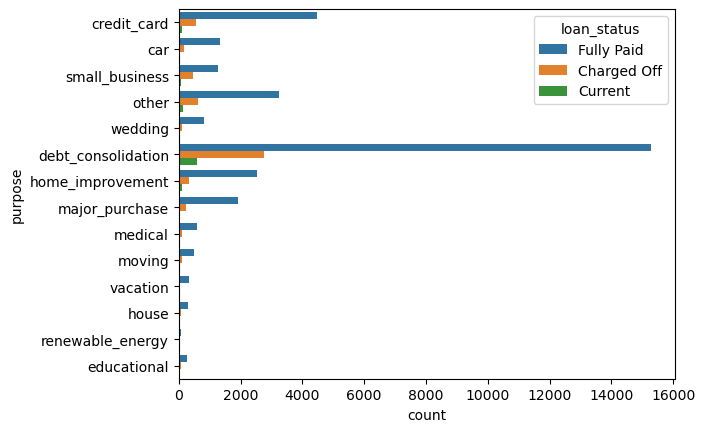

Higher chance of defaulted for " 0" in inq_last_6mths column


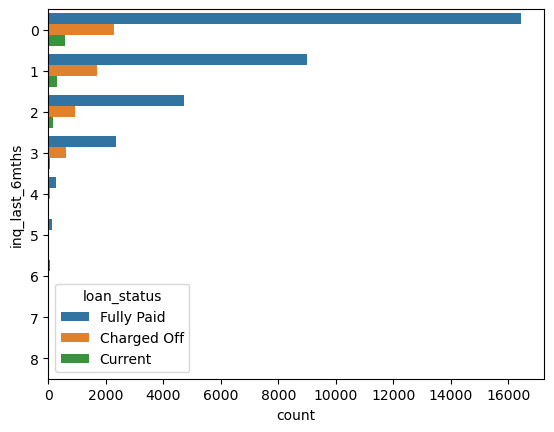

Higher chance of defaulted for " 0" in pub_rec column


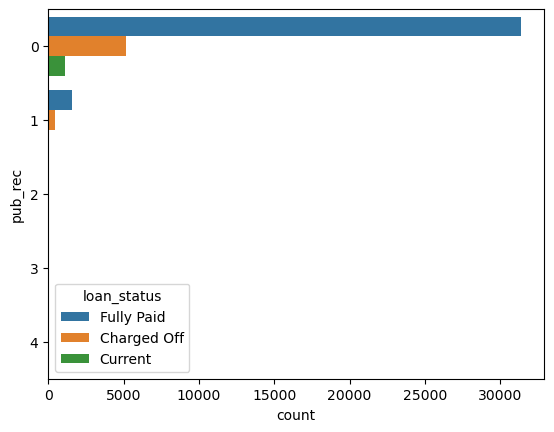

Higher chance of defaulted for " 0.0" in pub_rec_bankruptcies column


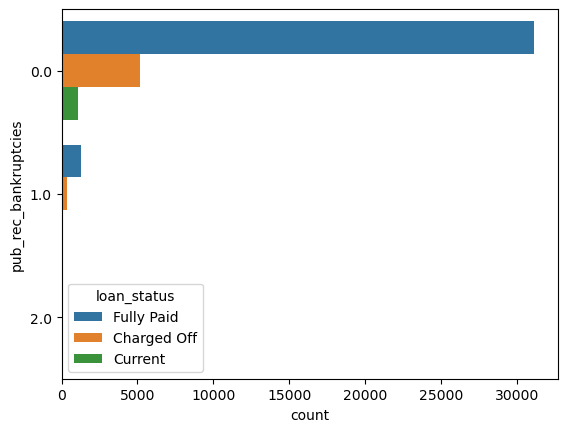

Higher chance of defaulted for " B" in grade column


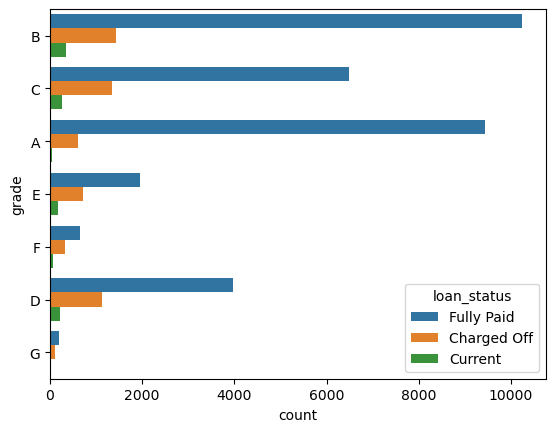

In [2203]:
def analysing_categorical_column(column, defaulted_applicant=defaulted_applicant):
    counts = defaulted_applicant[column].value_counts()
    print(Fore.RED + f'Higher chance of defaulted for \" {counts.index[0]}\" in {column} column')

for column in categorical_columns:
    analysing_categorical_column(column)
    sns.countplot(y=column, data=loan_applicants, hue=loan_applicants['loan_status'])
    plt.show()

Higher chance of defaulted for B grade of sub_grade " 5" column


<Axes: xlabel='count', ylabel='sub_grade'>

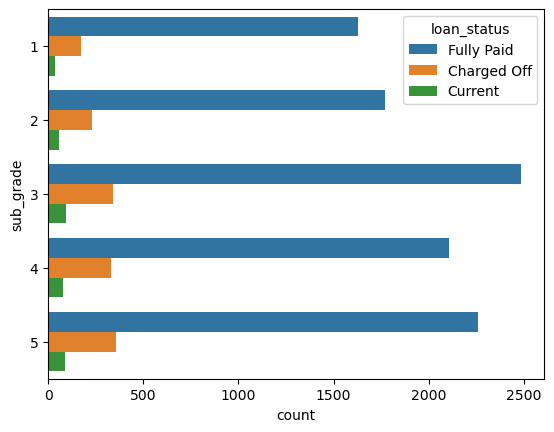

In [90]:
# As we see - Higher chance of defaulted for "B" in grade column
# Extracting B grade dataframe to get the subgrade division
grade_B = loan_applicants[loan_applicants['grade'] == 'B']

grade_B_defaulted = defaulted_applicant[defaulted_applicant['grade'] == 'B']
counts = grade_B_defaulted['sub_grade'].value_counts()
print(Fore.RED + f'Higher chance of defaulted for B grade of sub_grade \" {counts.index[0]}\" column')

sns.countplot(y=grade_B['sub_grade'], hue = loan_applicants['loan_status'], data = loan_applicants)

Higher chance of defaulted on month 12 of year 1911 on issue_d column


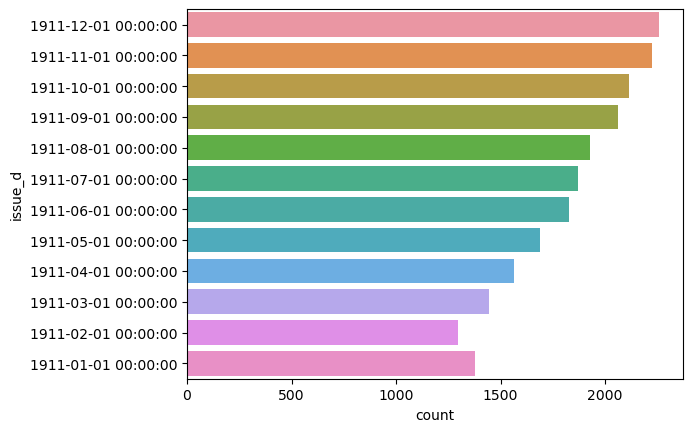

Higher chance of defaulted on month 10 of year 1900 on earliest_cr_line column


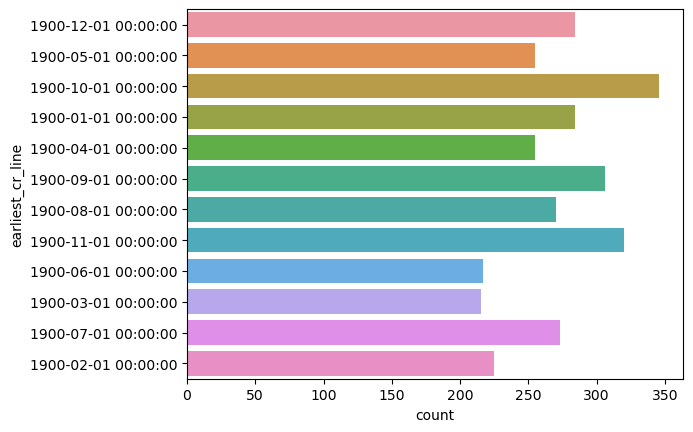

In [91]:
def get_max_year_df(column, loan_applicants=loan_applicants):
    # Get the Max year of column and plot the complete month of that year
    counts = pd.DatetimeIndex(loan_applicants[column]).year.value_counts()
    max_year = counts.index[0]
    # Getting datafram from that year
    max_year_df = loan_applicants[pd.DatetimeIndex(loan_applicants[column]).year == max_year]
    
    # Get the Max month of the Max year
    counts = pd.DatetimeIndex(max_year_df[column]).month.value_counts()
    max_month = counts.index[0]
    return max_year_df, max_year, max_month
    
for column in date_time_columns:
    max_year_df, max_year, max_month = get_max_year_df(column)
    print(Fore.RED + f'Higher chance of defaulted on month {max_month} of year {max_year} on {column} column')
    sns.countplot(y=pd.DatetimeIndex(max_year_df[column]), data=loan_applicants)
    plt.show()

### <font color="brown"> Observations </font>

- Lower the loan_amnt increases the chance of defaulted - Range (500 - 7720.0)
- Lower the funded_amnt increases the chance of defaulted - Range (500 - 7720.0)
- Lower the funded_amnt_inv increases the chance of defaulted - Range (0.0 - 7000.0)
- Lower the installment increases the chance of defaulted - Range (15.69 - 279.27)
- Lower the annual_inc increases the chance of defaulted - Range (4000.0 - 253264.0)
- Between 40%-60% of the dti increases the chance of defaulted - Range (11.94 - 17.91
- Lower the open_acc increases the chance of defaulted - Range (2 - 9.2)
- Between 20%-40% of the total_acc increases the chance of defaulted - Range (16.4 - 30.8)
- Lower the total_rec_late_fee increases the chance of defaulted - Range (0.0 - 36.04)
- Lower the recoveries increases the chance of defaulted - Range (0.0 - 5924.67)
- Lower the collection_recovery_fee increases the chance of defaulted - Range (0.0 - 1400.43)
- Between 40%-60% of the int_rate_p increases the chance of defaulted - Range (13.01 - 16.80)
- Between 60%-80% of the revol_util_p increases the chance of defaulted - Range (59.94 - 79.92)

- Higher chance of defaulted for "  36 months" in term column
- Higher chance of defaulted for " 10+ years" in emp_length column
- Higher chance of defaulted for " RENT" in home_ownership column
- Higher chance of defaulted for " Not Verified" in verification_status column
- Higher chance of defaulted for " debt_consolidation" in purpose column
- Higher chance of defaulted for " 0" in inq_last_6mths column
- Higher chance of defaulted for " 0" in pub_rec column
- Higher chance of defaulted for " 0.0" in pub_rec_bankruptcies column
- Higher chance of defaulted for " B" in grade column
- Higher chance of defaulted for B grade of sub_grade " 5" column

- Higher chance of defaulted on month 12 of year 1911 on issue_d column
- Higher chance of defaulted on month 10 of year 1900 on earliest_cr_line column

### <font color="brown">Bivariate Analysis </font> <a class="anchor" id="bivariate"></a>

### <font color="brown"> Analyzing the driving factor from two columns for defaulting the loan applicants</font>

In [92]:
column_information()

-------------------------------------------------------
Column                  Dtype           Unique Count
-------------------------------------------------------
1 loan_amnt               int64           885 
2 funded_amnt             int64           1041
3 funded_amnt_inv         float64         8205
4 term                    object          2   
5 int_rate                object          371 
6 installment             float64         15383
7 grade                   object          7   
8 sub_grade               int32           5   
9 emp_length              object          11  
10 home_ownership          object          4   
11 annual_inc              float64         5318
12 verification_status     object          3   
13 issue_d                 datetime64[ns]  55  
14 loan_status             object          3   
15 purpose                 object          14  
16 dti                     float64         2868
17 earliest_cr_line        datetime64[ns]  526 
18 inq_last_6mths          

We have 28 columns, out of it we are selecting below for bivarient analysis. Which has more driving factor for the defaulting loan applicants

##### Seperating it for Bivariant Analysing
- categorical_columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'inq_last_6mths',
                       'pub_rec', 'pub_rec_bankruptcies', 'grade']
- numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc',
                     'dti', 'open_acc', 'total_acc', 'total_rec_late_fee', 'recoveries',
                     'collection_recovery_fee', 'int_rate_p', 'revol_util_p']

In [93]:
def bivariant_btw_columns(column1, column2, loan_applicants = loan_applicants,
                          numerical_columns = numerical_columns, categorical_columns=categorical_columns):
    y_axis = None
    x_axis = None
    if (column1 in categorical_columns) or (column2 in categorical_columns):
        x_axis = column1
        y_axis = column2
    else:
        if column1 in numerical_columns:
            y_axis, bin_value =  convert_numerical_into_categorical(column1)
            x_axis = column2
            low = loan_applicants[column1].min()
        elif column2 in numerical_columns:
            y_axis, bin_value =  convert_numerical_into_categorical(column2)
            x_axis = column1
            low = loan_applicants[column2].min()
        print(f"0-20% : ({low} - {bin_value[1]})")
        print(f"20%-40% : ({bin_value[1]} - {bin_value[2]})")
        print(f"40%-60% : ({bin_value[2]} - {bin_value[3]})")
        print(f"60%-80% : ({bin_value[3]} - {bin_value[4]})")
        print(f"80%-100% : ({bin_value[4]} - {bin_value[5]})")

    sns.barplot(data=loan_applicants, y=y_axis, x=x_axis, hue='loan_status',palette="pastel")
    
    plt.show()

#### 1. Analysing loan_amnt

0-20% : (500 - 7400.0)
20%-40% : (7400.0 - 14300.0)
40%-60% : (14300.0 - 21200.0)
60%-80% : (21200.0 - 28100.0)
80%-100% : (28100.0 - 35000.0)


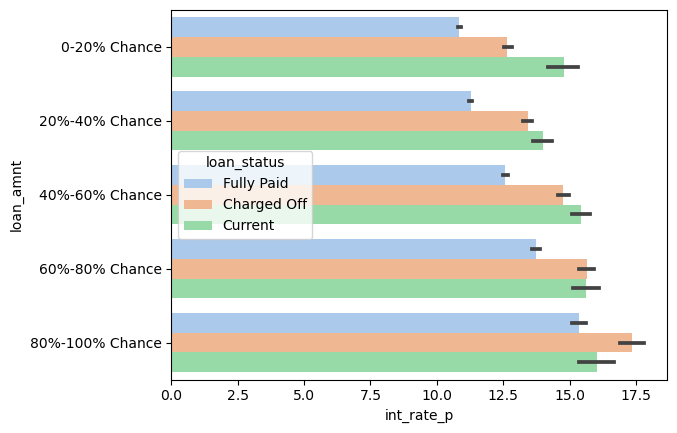

In [94]:
# Loan amount with Interest rate
bivariant_btw_columns('loan_amnt', 'int_rate_p' )

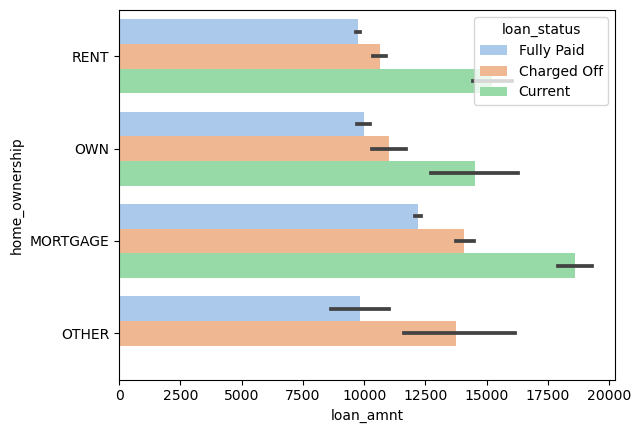

In [95]:
# Loan amount with home_ownership
bivariant_btw_columns('loan_amnt', 'home_ownership' )

0-20% : (500 - 7400.0)
20%-40% : (7400.0 - 14300.0)
40%-60% : (14300.0 - 21200.0)
60%-80% : (21200.0 - 28100.0)
80%-100% : (28100.0 - 35000.0)


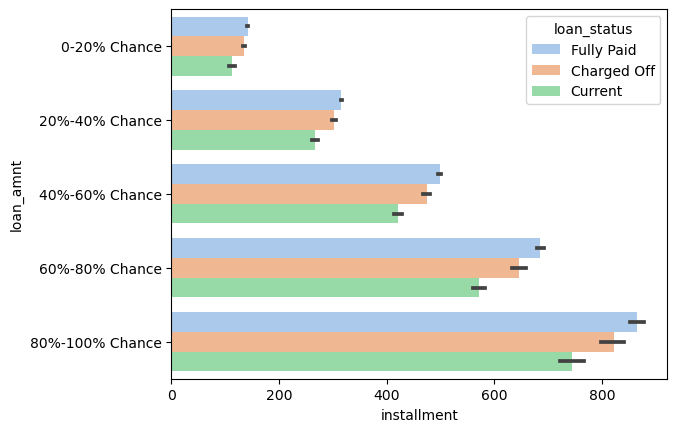

In [96]:
# Loan amount with installment
bivariant_btw_columns('loan_amnt', 'installment' )

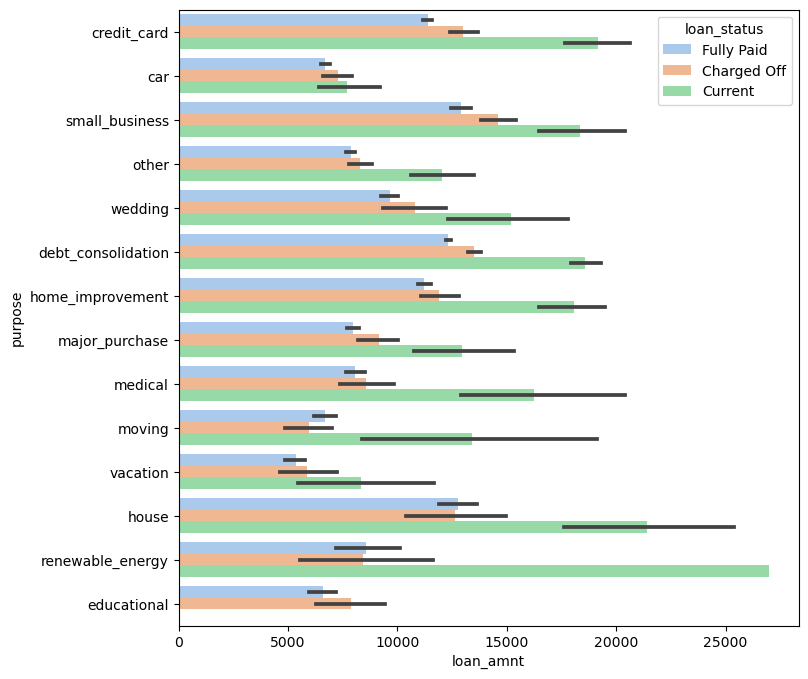

In [97]:
# Loan amount with purpose
plt.figure(figsize=(8,8))
bivariant_btw_columns('loan_amnt', 'purpose' )

### Observations on Loan Amount
- Loan amount increases on Interest rate increses where more chance of Applicant movng under Defaults category.
- High loan amount with applicant in MORTAGE have higher chance of Defaulted.
- Loan amount with installment increases where the chance of defaults are higher.
- Loan amount for 'Small business' purspose have high chance of defaults.

#### 2. Analysing annual_inc

0-20% : (4000.0 - 1203200.0)
20%-40% : (1203200.0 - 2402400.0)
40%-60% : (2402400.0 - 3601600.0)
60%-80% : (3601600.0 - 4800800.0)
80%-100% : (4800800.0 - 6000000.0)


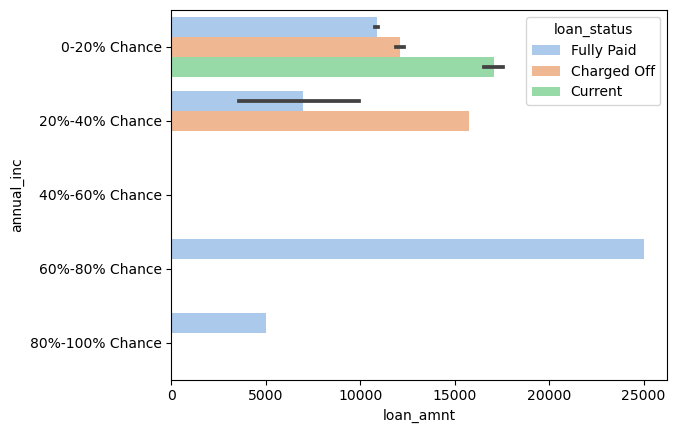

In [98]:
# annual_inc with loan_amnt
bivariant_btw_columns('annual_inc', 'loan_amnt' )

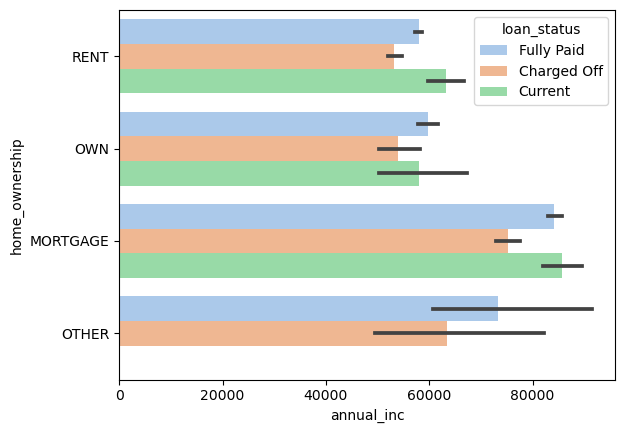

In [99]:
# annual_inc with home_ownership
bivariant_btw_columns('annual_inc', 'home_ownership' )

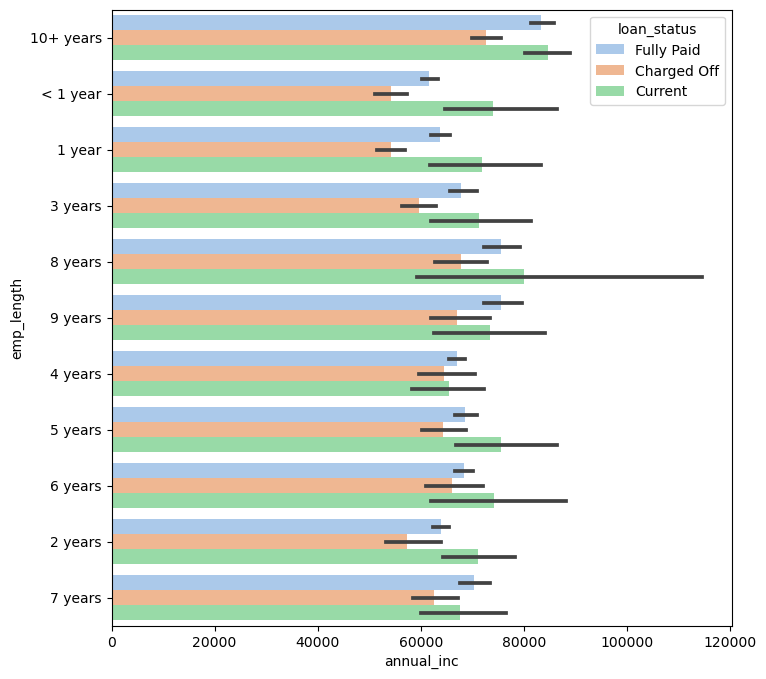

In [100]:
# annual_inc with emp_length
plt.figure(figsize=(8,8))
bivariant_btw_columns('annual_inc', 'emp_length' )

0-20% : (4000.0 - 1203200.0)
20%-40% : (1203200.0 - 2402400.0)
40%-60% : (2402400.0 - 3601600.0)
60%-80% : (3601600.0 - 4800800.0)
80%-100% : (4800800.0 - 6000000.0)


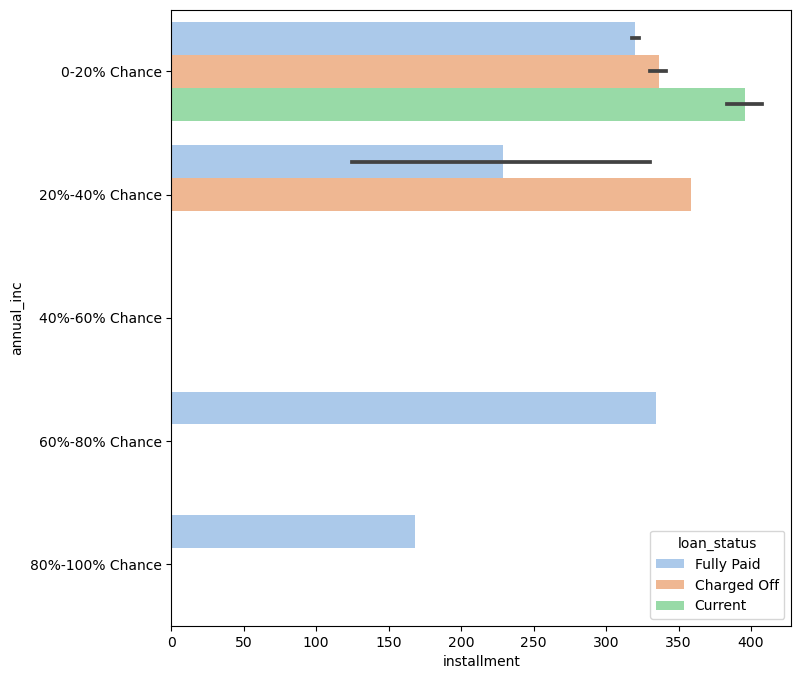

In [101]:
# annual_inc with installment
plt.figure(figsize=(8,8))
bivariant_btw_columns('annual_inc', 'installment' )

0-20% : (4080.0 - 1203200.0)
20%-40% : (1203200.0 - 2402400.0)
40%-60% : (2402400.0 - 3601600.0)
60%-80% : (3601600.0 - 4800800.0)
80%-100% : (4800800.0 - 6000000.0)


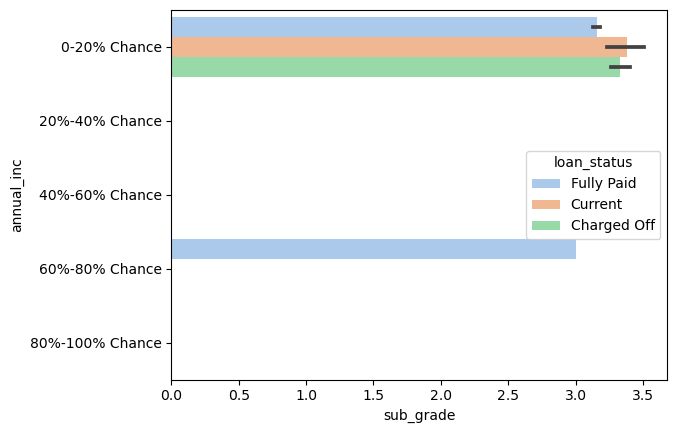

In [102]:
# As part of Univariate we know Grade B has more defaulted
# annual_inc with grades (B) and subgrade
bivariant_btw_columns('annual_inc', 'sub_grade', loan_applicants = grade_B)

#### Observations on Annual income
- Applicant with Annual income between (1203200.0 - 2402400.0) with higher loan_amnt have chance of defaulted.
- Applicant with Annual income with home_ownership as MORTAGE has higher chance of defaulted.
- Applicant with Annual income and having 10+ years of experience has higher chance of defaulted.
- Applicant with Annual income between (1203200.0 - 2402400.0) with more installment have chance of defaulted.
- Applicant with Annual income between (4080.0 - 1203200.0) with grade B and subgrade of 3-3.5 have chance of defaulted


### <font color="brown"> Observations on Bivariate </font>

**Observations on Loan Amount:** 
- Loan amount increases on Interest rate increses where more chance of Applicant movng under Defaults category.
- High loan amount with applicant in MORTAGE have higher chance of Defaulted.
- Loan amount with installment increases where the chance of defaults are higher.
- Loan amount for 'Small business' purspose have high chance of defaults.

**Observations on Loan Amount**
- Applicant with Annual income between (1203200.0 - 2402400.0) with higher loan_amnt have chance of defaulted.
- Applicant with Annual income with home_ownership as MORTAGE has higher chance of defaulted.
- Applicant with Annual income and having 10+ years of experience has higher chance of defaulted.
- Applicant with Annual income between (1203200.0 - 2402400.0) with more installment have chance of defaulted.
- Applicant with Annual income between (4080.0 - 1203200.0) with grade B and subgrade of 3-3.5 have chance of defaulted

#### Creating Correlation Matrix

In [103]:
# Creating a correlation matrix for defaulted applicant
correlation_matrix = defaulted_applicant.corr()

In [104]:
# Showing the Correlation matrix in table form with rounding off to two
round(correlation_matrix, 2)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,sub_grade,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,int_rate_p,revol_util_p
loan_amnt,1.00,0.98,0.91,0.93,0.01,0.35,0.06,0.01,0.18,-0.05,0.28,0.09,0.31,0.16,-0.03,0.35,0.04
funded_amnt,0.98,1.00,0.93,0.95,0.00,0.35,0.06,0.01,0.18,-0.05,0.28,0.09,0.32,0.16,-0.03,0.35,0.05
funded_amnt_inv,0.91,0.93,1.00,0.86,0.01,0.31,0.07,-0.02,0.15,-0.05,0.25,0.07,0.30,0.14,-0.04,0.37,0.07
installment,0.93,0.95,0.86,1.00,-0.00,0.36,0.04,0.02,0.18,-0.04,0.25,0.12,0.30,0.19,-0.03,0.33,0.07
sub_grade,0.01,0.00,0.01,-0.00,1.00,-0.01,0.03,0.02,0.02,0.00,0.03,-0.01,0.01,0.00,-0.01,-0.04,-0.00
annual_inc,0.35,0.35,0.31,0.36,-0.01,1.00,-0.09,0.04,0.21,-0.01,0.29,0.06,0.13,0.09,-0.00,0.13,0.07
dti,0.06,0.06,0.07,0.04,0.03,-0.09,1.00,-0.03,0.30,0.01,0.27,-0.04,0.03,0.01,0.02,0.04,0.23
inq_last_6mths,0.01,0.01,-0.02,0.02,0.02,0.04,-0.03,1.00,0.08,0.01,0.10,0.02,-0.01,-0.01,0.01,0.06,-0.14
open_acc,0.18,0.18,0.15,0.18,0.02,0.21,0.30,0.08,1.00,0.05,0.69,-0.02,0.06,0.02,0.06,0.04,-0.06
pub_rec,-0.05,-0.05,-0.05,-0.04,0.00,-0.01,0.01,0.01,0.05,1.00,0.02,-0.04,-0.05,-0.04,0.86,0.08,0.06


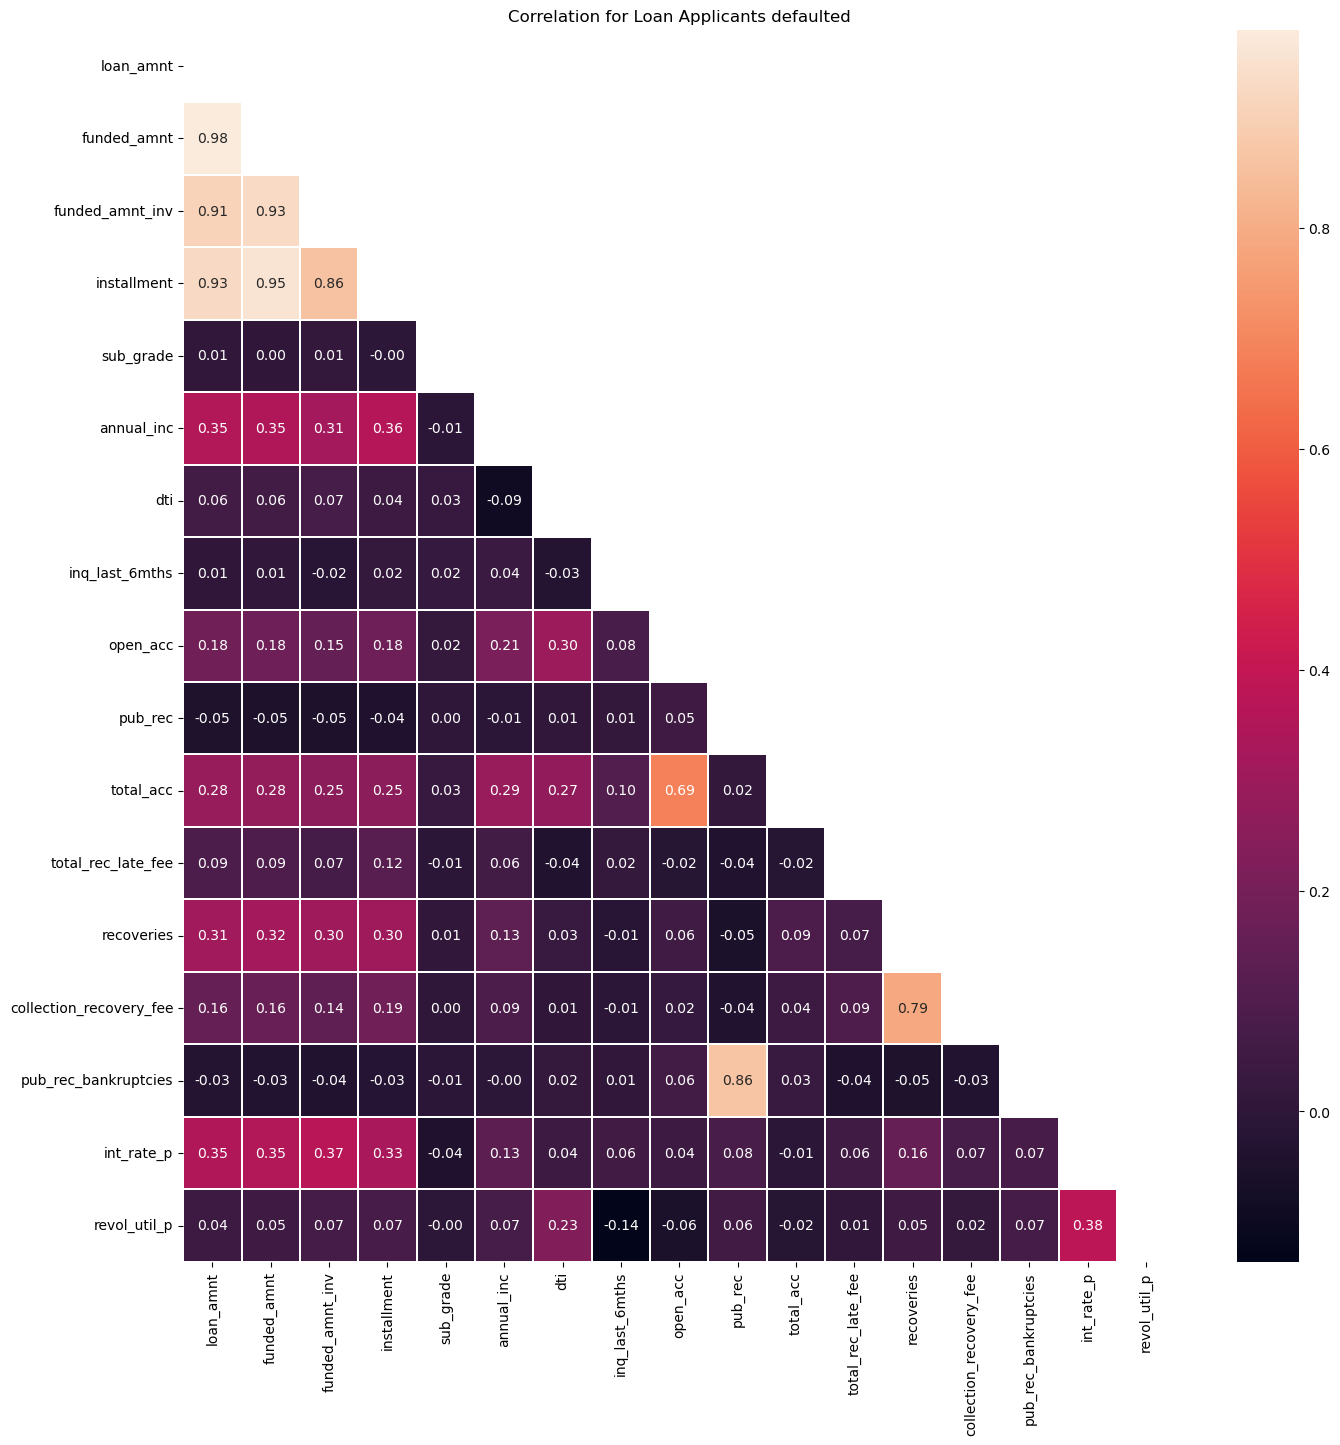

In [105]:
# co-relation Upper Triangle matrix
correlation_uppper_matrix = np.triu(correlation_matrix)

fig, ax = plt.subplots(figsize=(16,16))
# Masking the upper triangle matrix and rounding off with value 2.
heat_m = sns.heatmap(correlation_matrix, mask=correlation_uppper_matrix,fmt='.2f', linewidths=.2, annot=True, ax=ax)
heat_m.set_title("Correlation for Loan Applicants defaulted")

plt.show();

### Observations on Correlation matrix for defaulted:

**High Positive Impacts**
- Increase in funded amount with loan amount.
- Increase in installment with loan amount.
- Increase in funded amount with funded_amnt_inv.
- Increase in funded amount with funded_amnt_inv.
- Increase in installment with funded amount.
- Number of collection_recovery_fee & recoveries increases.
- Increase in public_rec and public_rec_bankruptcies
- open_acc with total_acc that the applicant has more impacts.

**Moderate Positive Impacts**
- Applicant Annual income with loan_amount/funded_amount and installment.
- open_acc with dti has moderate impact on defaulted.
- The int_rate_p with loan_amount, funded_amount, installment and revol_util_p has moderate impact.

## Conclusions <a class="anchor" id="conclusions"></a>

**Based on the observations following are high impacts:**
- Applicant annual income between (4000 - 253264)
- Higher loan amount with more installment.
- Interest rate between (13.01 - 16.80) has more impacts on defaulted.
- Applicant with more experience has high impacts on defaulted.
- Loan amount for 'Small business, credit card, house' purspose have high impacts on defaulted.
- High loan amount with applicant in MORTAGE have high impacts on defaulted.
- Applicant with open_acc & total_acc has more impacts on defaulted.